In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print(data.columns)

Mounted at /content/drive


NameError: name 'data' is not defined

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/cursoIA/Advertising.csv')

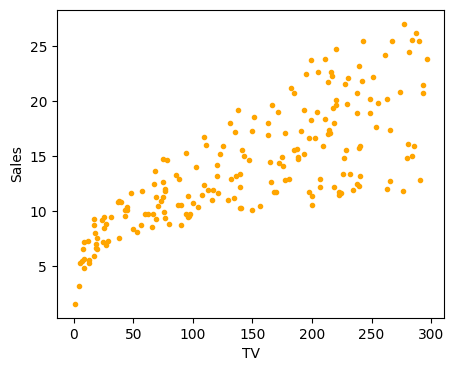

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,4])

# plt.subplot(1,3,1)
plt.scatter(data['TV'],data['Sales'],marker='.',color='orange')
plt.xlabel('TV')
plt.ylabel('Sales')

# plt.subplot(1,3,2)
# plt.scatter(data['Radio'],data['Sales'],color='green')
# plt.xlabel('Radio')
# plt.ylabel('Sales')

# plt.subplot(1,3,3)
# plt.scatter(data['Newspaper'],data['Sales'],color='blue')
# plt.xlabel('Newspaper')
# plt.ylabel('Sales')

plt.show()

# import matplotlib.pyplot as plt

# columns_lst = list(data.columns)[1:4]
# print(columns_lst)
# plt.figure(figsize=[10,7])

# # print([data['# Shares']]*5)

# for i,col in enumerate(columns_lst):
#     plt.subplot(2,3,i+1)
#     plt.scatter(data[col],data['Sales'],marker='.',cmap='gray')
#     plt.xlabel(col)
#     plt.ylabel('Sales')

# plt.show()

#covarianza

La covarianza entre dos variables aleatorias X e Y se define como:

$Cov(X,Y) = E[(X-E[X])(Y-E[Y])]$

$Cov(X,Y)= \frac{1}{n}\Sigma (X-E[x])(Y-E[Y])$

In [ ]:
def covar(x,y):
    x1 = x - np.mean(x)
    y1 = y - np.mean(y)
    # sum1 = np.dot(x1,y1)
    sum1 = sum(x1*y1)
    return sum1/(len(x)-1)

In [ ]:
import numpy as np
from numpy import cov

c = np.cov(data['TV'], data['Sales'])
columns_lst = list(data.columns)[1:5]
print("print with handmade function")
for col in columns_lst:
    print(covar(data[col],data['Sales']))

print("print using numpy function")
for col in columns_lst:
    print(cov(data[col],data['Sales'],bias=False)[0,1])

print with handmade function
350.390194723618
44.63568844221103
25.94139195979899
27.22185301507536
print using numpy function
350.39019472361804
44.635688442211034
25.94139195979899
27.22185301507536


In [ ]:
# sum_cov = 4x1 dot 1x4

print(columns_lst)

print(data[columns_lst].cov())
cov_mat = np.zeros((4,4))
for i,x in enumerate(columns_lst):
    for e,y in enumerate(columns_lst):
        cov_mat[e,i] = covar(data[x],data[y])
print(cov_mat)

['TV', 'Radio', 'Newspaper', 'Sales']
                    TV       Radio   Newspaper       Sales
TV         7370.949893   69.862492  105.919452  350.390195
Radio        69.862492  220.427743  114.496979   44.635688
Newspaper   105.919452  114.496979  474.308326   25.941392
Sales       350.390195   44.635688   25.941392   27.221853
[[7370.94989322   69.86249246  105.91945226  350.39019472]
 [  69.86249246  220.42774271  114.49697889   44.63568844]
 [ 105.91945226  114.49697889  474.30832563   25.94139196]
 [ 350.39019472   44.63568844   25.94139196   27.22185302]]


#Correlacion de Pearson
$\rho_{x,y} = \frac{\sigma_{xy}}{\sigma_x\sigma_y} = \frac{cov(x,y)}{\sqrt{var(x)*var(y)}}$

donde

$\sigma_{xy}$ es la coavarianza de x,y

$\sigma_x$ es la desviacion estandar de x

In [ ]:
def corr_pearson(x,y):
    rho_xy = covar(x,y)/np.sqrt(covar(x,x)*covar(y,y))
    return rho_xy

In [ ]:
print("Perason correlation using handmade-function")
corr_mat = np.zeros((4,4))
for i,x in enumerate(columns_lst):
    for e,y in enumerate(columns_lst):
        corr_mat[e,i] = corr_pearson(data[x],data[y])

print(corr_mat)
print("Perason correlation using numpy's function")
print(data[columns_lst].corr())

Perason correlation using handmade-function


NameError: name 'np' is not defined

$h_\theta(x)=\theta_1 x + \theta_0$

MSE:

$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta (x_i)-y_i)^2$

MAE

$J(\theta)=\frac{1}{2m}\sum_{i=1}^m|h_\theta (x_i)-y_i|$

In [ ]:
import seaborn as sns

def graf_calor(data):

  correlacion = data[columns_lst].corr()
  fig, ax = plt.subplots(figsize = (4,4),  facecolor = ('gray') )
  plt.xticks(fontsize = 12, color = 'black')
  plt.yticks(fontsize = 12, color = 'black')

  sns.heatmap(correlacion, center = 0, vmax = 1.0, fmt = '.3f', linewidths = 2, linecolor = 'black', cmap = 'bone_r', annot = True) # annot posiciona valores en la grafica/ fmt decimales/ cmap colores
  plt.show();

#Días transcurridos = Elapsed days
X = ['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days','# Shares']

graf_calor(data)

In [ ]:
import numpy as np
def hip(theta_0,theta_1,x):
    h = theta_1*x + theta_0
    return h

def MSE(theta0,theta1,x,y):
    block = hip(theta0,theta1,x) - y

    m = len(x)
    return sum(block*block)/(2*m)

def MAE(theta0,theta1,x,y):
    block = hip(theta0,theta1,x) - y

    m = len(x)
    return (1/2*m)*sum(abs(block))



Costo: 5.273693007331075


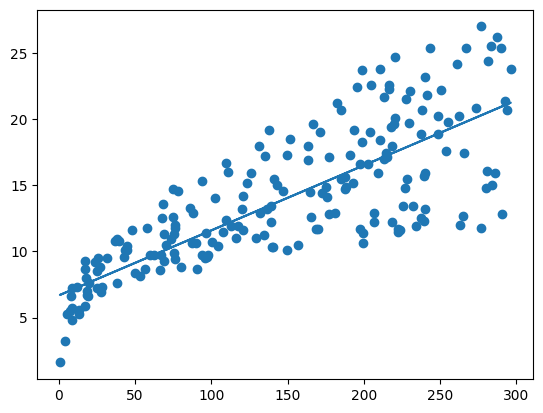

In [ ]:
# columns_lst = list(data.columns)[1:5]
theta0=6.67
theta1=0.049155555
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
x = data['TV']
y = data['Sales']

h = hip(theta0,theta1,x)
costo = MSE(theta0 , theta1 , x , y)
print("Costo: "+str(costo))

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,h)
plt.show()

Tarea para e jueves, vamos aimplementar el gd para el error cuadrático medio y aplicar en una de las tres variables de la base de datos para TV, radio y periódicos. Vamos a normalizar, mediante el máximo y minimo de los valores de tv, radio y periódico. De modo que distribuimos de una forma libre los datos, y los acotamos entre 0 y 1. De esta manera, que se entrena mas rápido, ay que hacerlo con y sin normalización, deberíamos encontrar valores parecidos a los encontrados a mano.  Las thetas se eligirian aleatoriamente entre 0 y 1. Aplicar gd al mse.

Realizar un programa que aplique el gradiente descendente para la función

$h_\theta(x)=\theta_1 x + \theta_0$

MSE:

$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta (x_i)-y_i)^2$

el algoritmo Gradiente descendiente se repite hasta alcanzar converger

$\theta_0:=\theta_0-\frac{\alpha}{m}\sum_{i=1}^m (h_{\theta}(x_i)-y_i)$

$\theta_1:=\theta_1-\frac{\alpha}{m}\sum_{i=1}^m (h_{\theta}(x_i)-y_i)x_i$

In [ ]:
theta_0=5
theta_1=0.0

In [ ]:
# y=data['Sales']
# x=data['TV']

# theta_0=7.032593038945596
# theta_1=0.04753664302381351

m = len(data['Sales'])
mse = MSE(theta_0,theta_1,x,y)

alpha = 6e-5
epochs = 1000000;
list_theta0 = []
list_theta1 = []
list_mse = []

list_theta0.append(theta_0)
list_theta1.append(theta_1)
list_mse.append(mse)

for epoch in range(epochs):
    theta_0 = theta_0 - (alpha/m)*sum( hip(theta_0,theta_1,x) - y )
    theta_1 = theta_1 - (alpha/m)*sum( ( hip(theta_0,theta_1,x) - y )*x )
    mse = MSE(theta_0,theta_1,x,y)
    list_theta0.append(theta_0)
    list_theta1.append(theta_1)
    list_mse.append(mse)

print("list theta0 max value: "+str(max(list_theta0))+", min value: "+str(min(list_theta0)))
print("list theta0 first value: "+str(list_theta0[0])+", last value: "+str(list_theta0[-1]))
print("list theta1 max value: "+str(max(list_theta1))+", min value: "+str(min(list_theta1)))
print("list theta1 first value: "+str(list_theta1[0])+", last value: "+str(list_theta1[-1]))
print("list MSE max value: "+str(max(list_mse))+", min value: "+str(min(list_mse)))
print("list MSE first value: "+str(list_mse[0])+", last value: "+str(list_mse[-1]))


list theta0 max value: 7.032593038945596, min value: 5
list theta0 first value: 5, last value: 7.032593038945596
list theta1 max value: 0.10051497591255747, min value: 0.0
list theta1 first value: 0.0, last value: 0.04753664302381351
list MSE max value: 54.24562499999999, min value: 5.256326457828405
list MSE first value: 54.24562499999999, last value: 5.256326457828409


ajuste de la funcion

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)

# y = data['# Shares']
costo = MSE(theta_0 , theta_1 , x , y)
print("theta_0: "+str(theta_0) \
        +" theta_1: "+str(theta_1))
print("Costo: ",costo)

import matplotlib.pyplot as plt
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(x,y,marker='.')
plt.plot(x,h)
plt.show()

NameError: name 'theta_0' is not defined

progreso del entrenamiento

In [ ]:
R2 = 1 - sum((h-y)**2)/sum((y-np.mean(y))**2)

print(R2)

0.6105927120918673


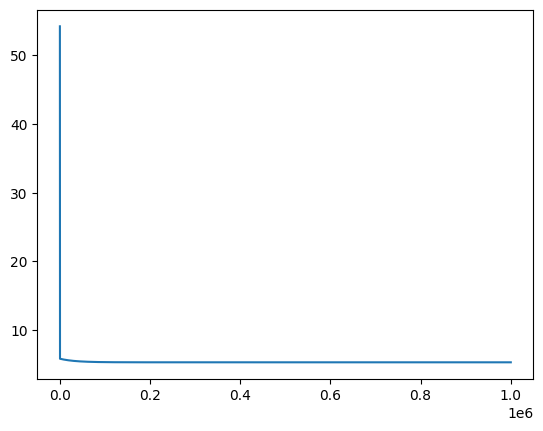

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)

# y = data['# Shares']
# costo = MSE(theta_0 , theta_1 , x , y)
# print("Costo: ",costo)

import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse)
plt.show()

5.838592434574082


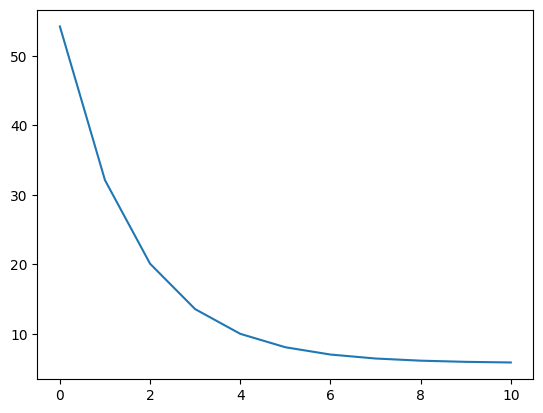

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)
print(list_mse[11])
# y = data['# Shares']
# costo = MSE(theta_0 , theta_1 , x , y)
# print("Costo: ",costo)

import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse[0:11])
plt.show()

5.777650260717689


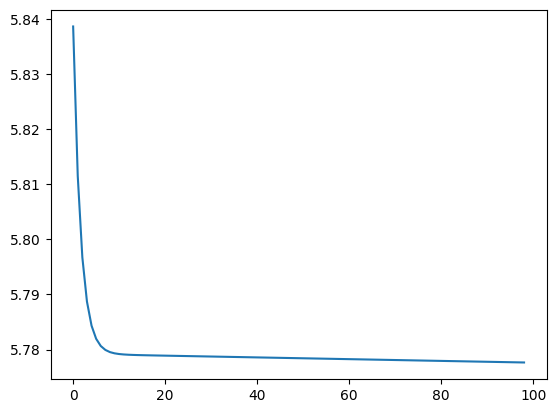

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)
print(list_mse[110])
# y = data['# Shares']
# costo = MSE(theta_0 , theta_1 , x , y)
# print("Costo: ",costo)

import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse[11:110])
plt.show()

5.256326457828409


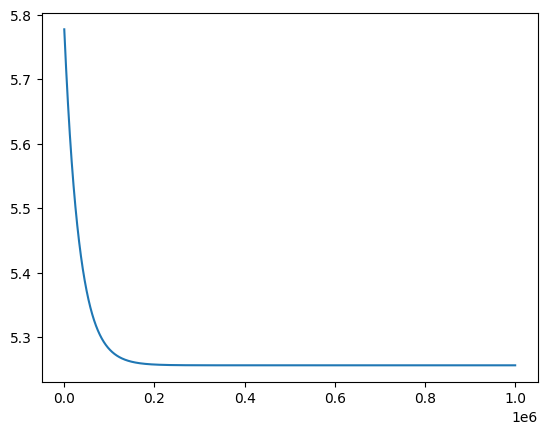

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)
print(list_mse[1000000])
# y = data['# Shares']
# costo = MSE(theta_0 , theta_1 , x , y)
# print("Costo: ",costo)

import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse[110:1000000])
plt.show()

clase despues de examen

In [ ]:
import numpy as np

theta = np.random.rand(2,1)
X = np.random.rand(15,2)
print(np.dot(X,theta))

[[0.06587605]
 [0.08646402]
 [0.08471214]
 [0.03240622]
 [0.05089219]
 [0.02994014]
 [0.04012315]
 [0.021209  ]
 [0.01265581]
 [0.06683581]
 [0.06118297]
 [0.09664736]
 [0.05242578]
 [0.06820766]
 [0.08859926]]


#salida softmax

In [ ]:
import numpy as np

y= [3.2,1.3,0.2,0.8]
def softmax(y):
    return np.exp(y)/sum(np.exp(y))

print(softmax(y))
print(sum(softmax(y)))

[0.77514955 0.11593805 0.03859242 0.07031998]
1.0000000000000002


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target
print(X.shape, Y.shape)